# Daily Climate Time Data
In diesem Datensatz analysieren wir mithilfe von Time Series Analysen Methoden die Wetterdaten aus Dehli von Indien.

## Loading Packages

In [16]:
import numpy as np
import pandas as pd
import statsmodels as sm
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## Loading Data

In [2]:
train = pd.read_csv('DailyDelhiClimateTrain.csv',parse_dates=True)
test = pd.read_csv('DailyDelhiClimateTest.csv', parse_dates=True)

In [3]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


### Making the date variable available as Date 

In [5]:
train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [6]:
train['date']= pd.to_datetime(train['date'])
test['date']= pd.to_datetime(test['date'])

In [7]:
train = train.set_index('date')
test = test.set_index('date')

### Plotting the variables over time and the rolling mean

<Axes: xlabel='date'>

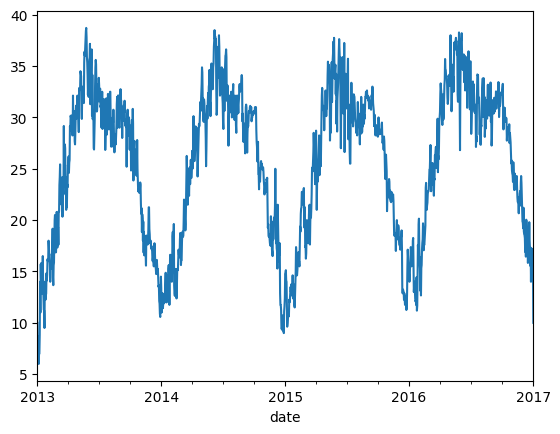

In [8]:
train['meantemp'].plot()

In [9]:
train['rollingmeantemp'] = train['meantemp'].rolling(window=14).mean()

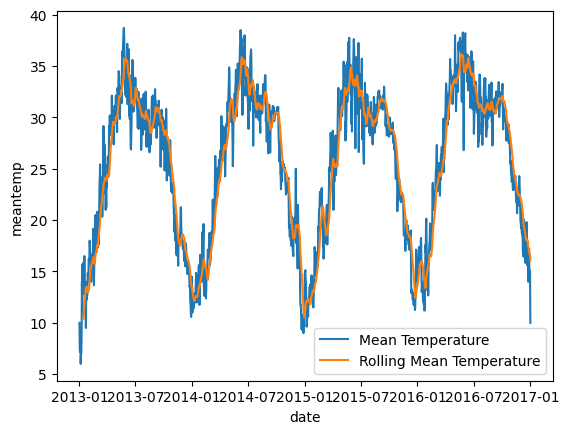

In [10]:
sns.lineplot(data = train, x = "date", y= "meantemp", label = "Mean Temperature")
sns.lineplot(data = train, x = "date", y= "rollingmeantemp", label = "Rolling Mean Temperature")
plt.legend()
plt.show()

<Axes: xlabel='date', ylabel='humidity'>

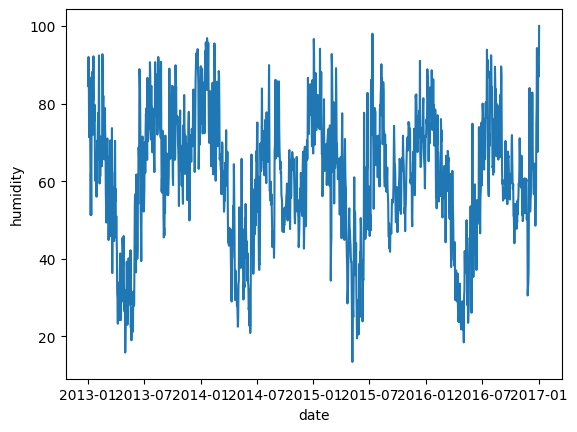

In [11]:
sns.lineplot(data = train, x = "date", y="humidity")

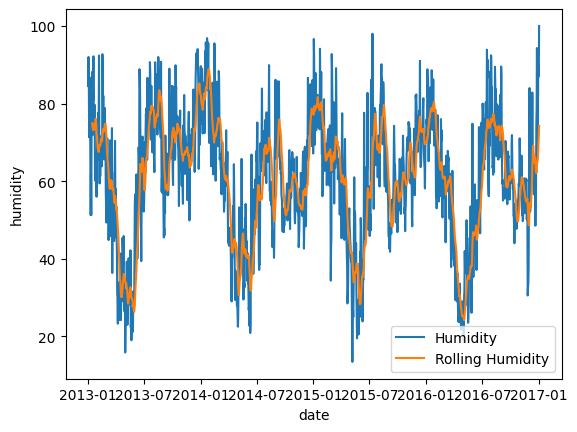

In [12]:
train['rollinghumidity'] = train['humidity'].rolling(14).mean()
sns.lineplot(data = train, x = "date", y = "humidity", label = "Humidity")
sns.lineplot(data = train, x = "date", y = "rollinghumidity", label = "Rolling Humidity")
plt.legend()
plt.show()

### Error Trend Sesonality Decomposition (ETS)

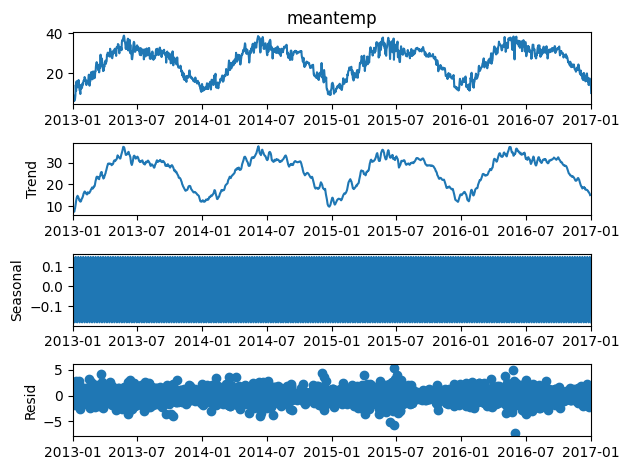

In [17]:
result = sm.tsa.seasonal.seasonal_decompose(train['meantemp'],model = 'additive')
result.plot();

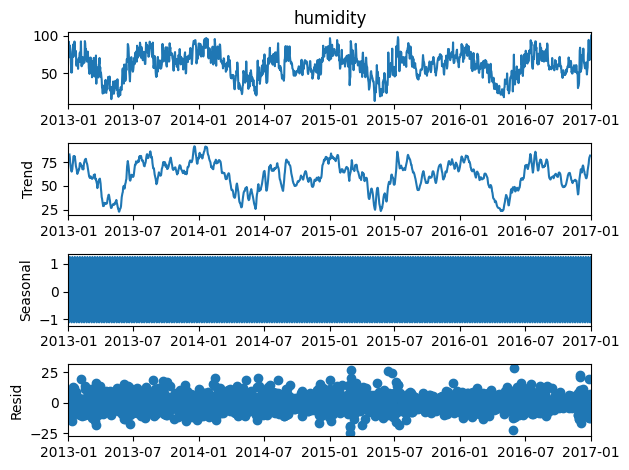

In [18]:
result = sm.tsa.seasonal.seasonal_decompose(train['humidity'],model = 'additive')
result.plot();

Exponential Weighted Moving Average (EWMA)

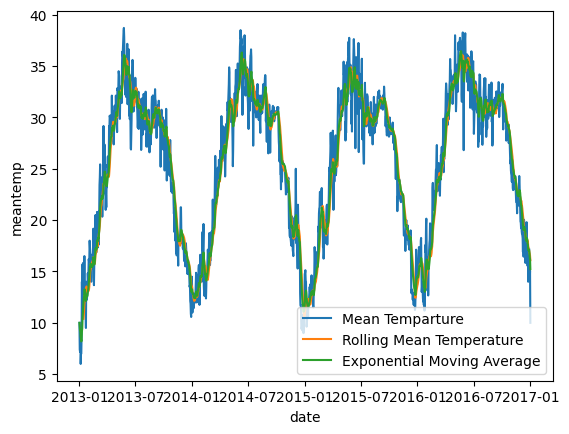

In [20]:
train['EWMA12'] = train['meantemp'].ewm(span=12,adjust=False).mean()
sns.lineplot(data = train, x = "date", y = "meantemp", label = "Mean Temparture")
sns.lineplot(data = train, x = "date", y = "rollingmeantemp", label = "Rolling Mean Temperature")
sns.lineplot(data = train, x= "date", y="EWMA12", label = "Exponential Moving Average")
plt.legend()
plt.show()

## Holt-Winters Mehtods

### Simple Exponential Smoothing 

In [22]:
# Fixing smoothing parameter
span = 12
alpha = 2/(span+1)

train['SES12'] = sm.tsa.holtwinters.SimpleExpSmoothing(train['meantemp']).fit(smoothing_level=alpha, optimized = False).fittedvalues.shift(-1)
train.head()

/Users/ystaudt/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,meantemp,humidity,wind_speed,meanpressure,rollingmeantemp,rollinghumidity,EWMA12,SES12
date,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,10.000000,10.000000
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,9.600000,9.600000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,9.225641,9.225641
2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,9.139645,9.139645
2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,8.656623,8.656623


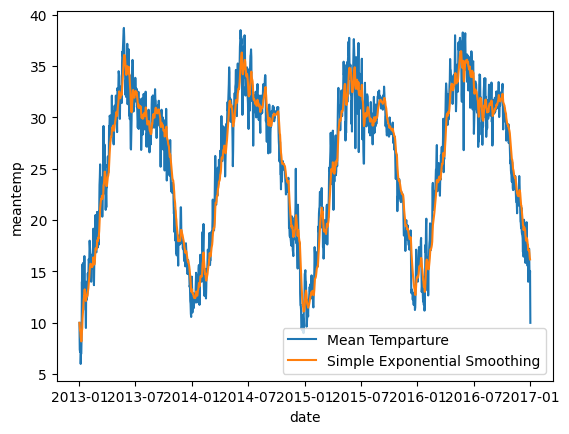

In [23]:
sns.lineplot(data = train, x = "date", y = "meantemp", label = "Mean Temparture")
sns.lineplot(data = train, x= "date", y="SES12", label = "Simple Exponential Smoothing")
plt.legend()
plt.show()

### Double Exponential Smoothing

In [27]:
train['DESadd12'] = sm.tsa.holtwinters.ExponentialSmoothing(train['meantemp'], trend='add').fit().fittedvalues.shift(-1)
train.head()

/Users/ystaudt/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,meantemp,humidity,wind_speed,meanpressure,rollingmeantemp,rollinghumidity,EWMA12,SES12,DESadd12
date,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,10.000000,10.000000,9.875537
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,9.600000,9.600000,7.944650
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,9.225641,9.225641,7.338611
2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,9.139645,9.139645,8.376221
2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,8.656623,8.656623,6.522844


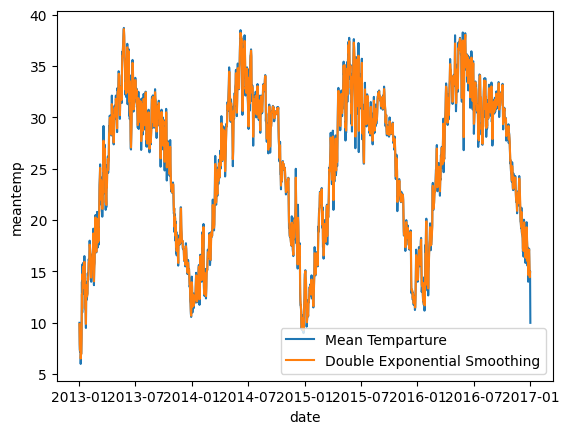

In [28]:
sns.lineplot(data = train, x = "date", y = "meantemp", label = "Mean Temparture")
sns.lineplot(data = train, x= "date", y="DESadd12", label = "Double Exponential Smoothing")
plt.legend()
plt.show()

### Triple Exponential Smoothing

In [30]:
train['TESadd12'] = sm.tsa.holtwinters.ExponentialSmoothing(train['meantemp'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
train.head()

/Users/ystaudt/opt/anaconda3/envs/timeseries/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


,meantemp,humidity,wind_speed,meanpressure,rollingmeantemp,rollinghumidity,EWMA12,SES12,DESadd12,TESadd12
date,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,10.000000,10.000000,9.875537,9.392048
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,9.600000,9.600000,7.944650,10.039833
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,9.225641,9.225641,7.338611,7.987389
2013-01-04,8.666667,71.333333,1.233333,1017.166667,NaN,NaN,9.139645,9.139645,8.376221,7.520713
2013-01-05,6.000000,86.833333,3.700000,1016.500000,NaN,NaN,8.656623,8.656623,6.522844,8.350802


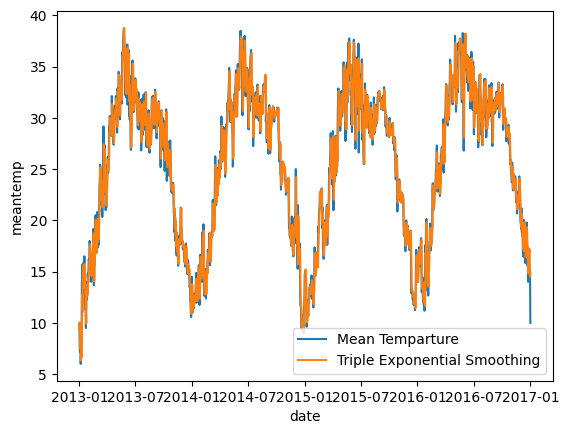

In [31]:
sns.lineplot(data = train, x = "date", y = "meantemp", label = "Mean Temparture")
sns.lineplot(data = train, x= "date", y="TESadd12", label = "Triple Exponential Smoothing")
plt.legend()
plt.show()

## Autocorrelation

In [34]:
arr = sm.tsa.stattools.acf(train['meantemp'])
arr

array([1.        , 0.9711027 , 0.95095435, 0.93435913, 0.92457295,
       0.91551781, 0.90737097, 0.89843343, 0.89046222, 0.88351839,
       0.87855285, 0.87618765, 0.87108249, 0.86575916, 0.85981725,
       0.85384141, 0.84625367, 0.83890942, 0.83112316, 0.82443026,
       0.8159426 , 0.80555558, 0.79472453, 0.78396174, 0.77645828,
       0.76750406, 0.75910245, 0.74987832, 0.74150154, 0.7333316 ,
       0.72481656, 0.71526761])

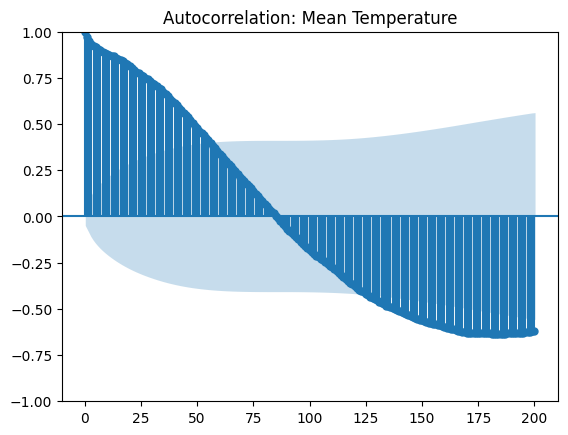

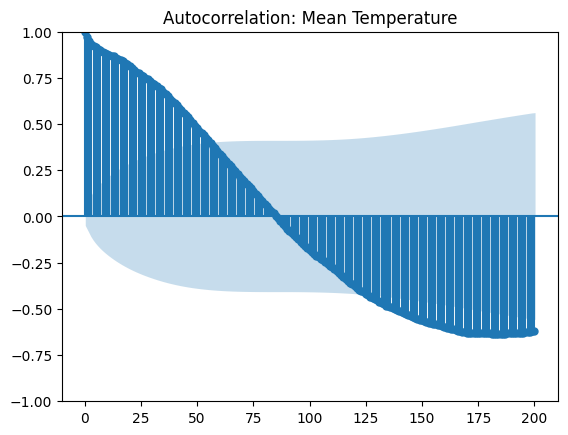

In [36]:
sm.graphics.tsaplots.plot_acf(train['meantemp'], title="Autocorrelation: Mean Temperature", lags = 200)